In [60]:
import keys
import tweepy
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import os
import re
import pandas as pd
from datetime import date
from BERTModel import Model
import pymongo
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(*args, **kw)>

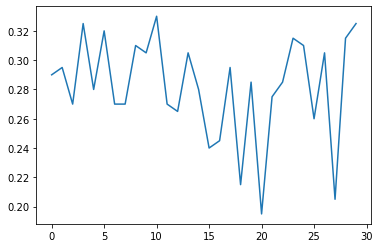

In [87]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
plt.plot(totals)
plt.show


In [103]:
client = pymongo.MongoClient('172.16.18.46:27017')
client.test.authenticate('test', 'passw0rd')
TweetCollection = client.tweets.tweets

In [104]:
totals = []
model = Model()
for day in TweetCollection.distinct("date"):
    tweets = []
    for tweet in TweetCollection.find({"date": day}):
        tweets.append(tweet["text"])
    predictions = model.getPrediction(tweets)
    total = 0
    for prediction in predictions:
        total = prediction[2]/4 + total
    totals.append(total/len(tweets))
print(totals)

INFO:tensorflow:Writing example 0 of 1


INFO:tensorflow:Writing example 0 of 1


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] Middle East respiratory syndrome co ##rona ##virus ( ME ##RS - Co ##V ) – The Kingdom of Saudi Arabia [SEP]


INFO:tensorflow:tokens: [CLS] Middle East respiratory syndrome co ##rona ##virus ( ME ##RS - Co ##V ) – The Kingdom of Saudi Arabia [SEP]


INFO:tensorflow:input_ids: 101 3089 1689 19192 9318 1884 15789 27608 113 22157 8900 118 3291 2559 114 782 1109 2325 1104 7721 8945 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3089 1689 19192 9318 1884 15789 27608 113 22157 8900 118 3291 2559 114 782 1109 2325 1104 7721 8945 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from ~/Twitter-Clustering/output/model.ckpt-2000


INFO:tensorflow:Restoring parameters from ~/Twitter-Clustering/output/model.ckpt-2000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


IndexError: tuple index out of range

In [ ]:
model = Model()

In [36]:
covid_data = pd.read_csv("covid_confirmed_usafacts.csv")

In [55]:
sums = covid_data.sum(axis=0)

In [92]:
totals

[0.29,
 0.295,
 0.27,
 0.325,
 0.28,
 0.32,
 0.27,
 0.27,
 0.31,
 0.305,
 0.33,
 0.27,
 0.265,
 0.305,
 0.28,
 0.24,
 0.245,
 0.295,
 0.215,
 0.285,
 0.195,
 0.275,
 0.285,
 0.315,
 0.31,
 0.26,
 0.305,
 0.205,
 0.315,
 0.325]

In [53]:
covid_data = covid_data.iloc[:, 4:]

In [78]:
for i in range(1, len(sums)):
    diff = np.append(diff, sums[i] - sums[i - 1])

In [90]:
diff = diff[-30:]

In [77]:
diff = np.array([])

In [101]:
diff

array([18844., 21332., 20481., 19466., 21775., 28751., 22901., 17969.,
       16982., 18577., 20442., 22520., 25704., 25727., 20464., 18579.,
       24502., 24441., 27171., 30938., 31721., 26863., 29374., 34944.,
       35407., 39084., 45802., 42289., 39869., 39131.])

<function matplotlib.pyplot.show(*args, **kw)>

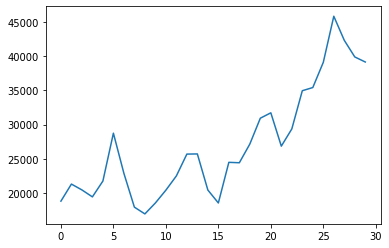

In [91]:
plt.plot(diff)
plt.show

In [99]:
sums[132]

1821073